In [1]:
from datasets import load_dataset
# Load the dataset
dataset = load_dataset("microsoft/ms_marco",'v1.1')


/Users/jigishap/Desktop/MLX-Week-2/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Dataset 

In [2]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [3]:
print(dataset)

DatasetDict({
    validation: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 10047
    })
    train: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 82326
    })
    test: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 9650
    })
})


In [4]:
# Access the training split
train_dataset = dataset['train']
validation_dataset = dataset['validation']
test_dataset = dataset['test']


In [5]:
print(train_dataset[0])


{'answers': ['Results-Based Accountability is a disciplined way of thinking and taking action that communities can use to improve the lives of children, youth, families, adults and the community as a whole.'], 'passages': {'is_selected': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 'passage_text': ["Since 2007, the RBA's outstanding reputation has been affected by the 'Securency' or NPA scandal. These RBA subsidiaries were involved in bribing overseas officials so that Australia might win lucrative note-printing contracts. The assets of the bank include the gold and foreign exchange reserves of Australia, which is estimated to have a net worth of A$101 billion. Nearly 94% of the RBA's employees work at its headquarters in Sydney, New South Wales and at the Business Resumption Site.", "The Reserve Bank of Australia (RBA) came into being on 14 January 1960 as Australia 's central bank and banknote issuing authority, when the Reserve Bank Act 1959 removed the central banking functions from the Commonw

In [6]:
# Show the first 5 examples in the training set
print(train_dataset.select(range(5)))

Dataset({
    features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
    num_rows: 5
})


# EDA

In [42]:
import pandas as pd

# Convert the train split to a pandas DataFrame
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])
validation_df = pd.DataFrame(dataset['validation'])

In [8]:
train_df.head()

,answers,passages,query,query_id,query_type,wellFormedAnswers
0,[Results-Based Accountability is a disciplined...,"{'is_selected': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]...",what is rba,19699,description,[]
1,[Yes],"{'is_selected': [0, 1, 0, 0, 0, 0, 0], 'passag...",was ronald reagan a democrat,19700,description,[]
2,[20-25 minutes],"{'is_selected': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]...",how long do you need for sydney and surroundin...,19701,numeric,[]
3,[$11 to $22 per square foot],"{'is_selected': [0, 0, 0, 0, 0, 0, 0, 0, 1], '...",price to install tile in shower,19702,numeric,[]
4,[Due to symptoms in the body],"{'is_selected': [0, 0, 1, 0, 0, 0, 0, 0], 'pas...",why conversion observed in body,19703,description,[]


In [9]:
train_df.shape

(82326, 6)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82326 entries, 0 to 82325
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   answers            82326 non-null  object
 1   passages           82326 non-null  object
 2   query              82326 non-null  object
 3   query_id           82326 non-null  int64 
 4   query_type         82326 non-null  object
 5   wellFormedAnswers  82326 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.8+ MB


In [11]:
train_df.isnull().sum()

answers              0
passages             0
query                0
query_id             0
query_type           0
wellFormedAnswers    0
dtype: int64

In [45]:
train_df.head()

,answers,passages,query,query_id,query_type,wellFormedAnswers
0,[Results-Based Accountability is a disciplined...,"{'is_selected': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]...",what is rba,19699,description,[]
1,[Yes],"{'is_selected': [0, 1, 0, 0, 0, 0, 0], 'passag...",was ronald reagan a democrat,19700,description,[]
2,[20-25 minutes],"{'is_selected': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]...",how long do you need for sydney and surroundin...,19701,numeric,[]
3,[$11 to $22 per square foot],"{'is_selected': [0, 0, 0, 0, 0, 0, 0, 0, 1], '...",price to install tile in shower,19702,numeric,[]
4,[Due to symptoms in the body],"{'is_selected': [0, 0, 1, 0, 0, 0, 0, 0], 'pas...",why conversion observed in body,19703,description,[]


# Textual Features Analysis

### 1. Length of Queries and Passage Text

In [18]:
import matplotlib.pyplot as plt

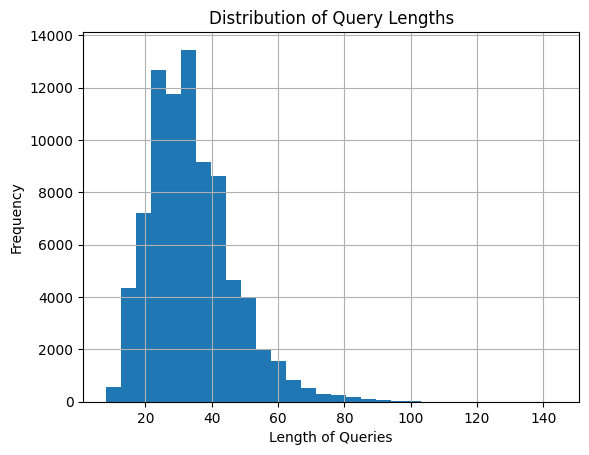

In [19]:
train_df['query_length'] = train_df['query'].apply(len)
train_df['query_length'].hist(bins=30)
plt.title('Distribution of Query Lengths')
plt.xlabel('Length of Queries')
plt.ylabel('Frequency')
plt.show()

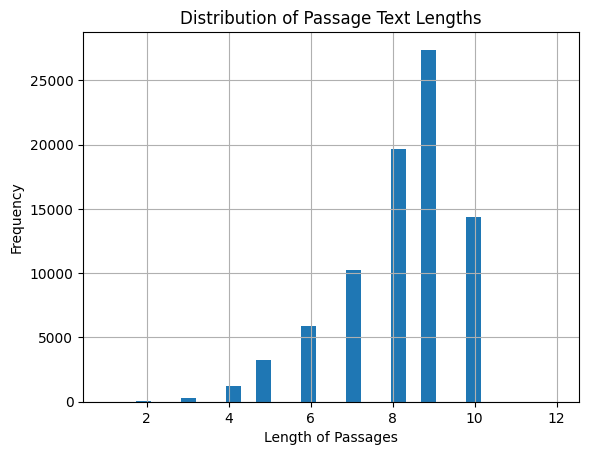

In [20]:
train_df['passage_length'] = train_df['passages'].apply(lambda x: len(x['passage_text']))
train_df['passage_length'].hist(bins=30)
plt.title('Distribution of Passage Text Lengths')
plt.xlabel('Length of Passages')
plt.ylabel('Frequency')
plt.show()

# Categorical Features Analysis
### 1. query_type Distribution

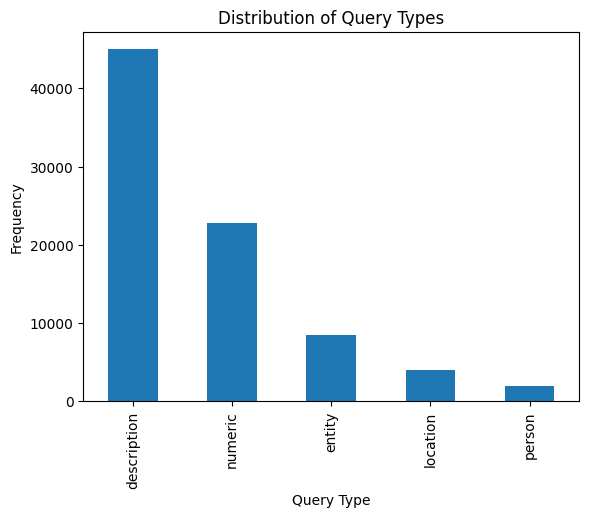

In [21]:
query_type_counts = train_df['query_type'].value_counts()
query_type_counts.plot(kind='bar')
plt.title('Distribution of Query Types')
plt.xlabel('Query Type')
plt.ylabel('Frequency')
plt.show()

# Cross-Feature Analysis

### 1. Passage Length by Query Type


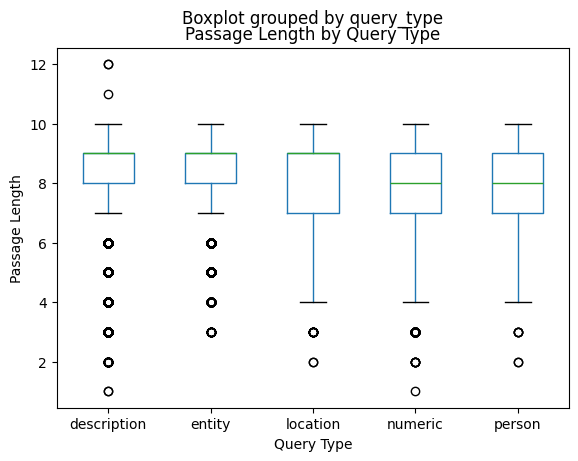

In [24]:
#Exploring the relationship between query_type and passage text length to see if certain types of queries are associated with longer or shorter passages

train_df['passage_length'] = train_df['passages'].apply(lambda x: len(x['passage_text']))

# Box plot of passage length by query type
train_df.boxplot(column='passage_length', by='query_type', grid=False)
plt.title('Passage Length by Query Type')
plt.xlabel('Query Type')
plt.ylabel('Passage Length')
plt.show()

# Dataset Preparation

In [63]:
import random
from typing import List, Tuple, Dict
from collections import defaultdict
import numpy as np

def generate_triples(df) -> List[Tuple[str, str, str]]:
    all_docs = set()
    query_to_relevant = defaultdict(set)
    triples = []

    # Collect all documents and map queries to relevant docs
    for _, row in df.iterrows():
        query = row['query']
        passages = row['passages']
        is_selected = np.array(passages['is_selected'])
        passage_texts = np.array(passages['passage_text'])

        all_docs.update(passage_texts)
        relevant_docs = passage_texts
        query_to_relevant[query].update(relevant_docs)

    all_docs = list(all_docs)
    doc_to_index = {doc: i for i, doc in enumerate(all_docs)}

    # Pre-compute irrelevant document indices for each query
    query_to_irrelevant_indices = {}
    for query, relevant_docs in query_to_relevant.items():
        relevant_indices = set(doc_to_index[doc] for doc in relevant_docs)
        irrelevant_indices = list(set(range(len(all_docs))) - relevant_indices)
        query_to_irrelevant_indices[query] = irrelevant_indices

    # Generate triples
    for query, relevant_docs in query_to_relevant.items():
        if not relevant_docs:
            continue

        irrelevant_indices = query_to_irrelevant_indices[query]
        num_relevant = len(relevant_docs)
        num_samples = min(num_relevant, len(irrelevant_indices))
        sampled_irrelevant_indices = random.sample(irrelevant_indices, num_samples)
        irrelevant_docs = [all_docs[i] for i in sampled_irrelevant_indices]

        triples.extend((query, relevant_doc, irrelevant_doc)
                       for relevant_doc in relevant_docs
                       for irrelevant_doc in irrelevant_docs)

    return triples


In [64]:
train_df[0:1]

,answers,passages,query,query_id,query_type,wellFormedAnswers
0,[Results-Based Accountability is a disciplined...,"{'is_selected': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]...",what is rba,19699,description,[]


In [65]:
triples = generate_triples(train_df[0:2])
print(f"Generated {len(triples)} triples.")


Generated 2 triples.


In [67]:
triples[0]

('what is rba',
 np.str_('Results-Based Accountability® (also known as RBA) is a disciplined way of thinking and taking action that communities can use to improve the lives of children, youth, families, adults and the community as a whole. RBA is also used by organizations to improve the performance of their programs. Creating Community Impact with RBA. Community impact focuses on conditions of well-being for children, families and the community as a whole that a group of leaders is working collectively to improve. For example: “Residents with good jobs,” “Children ready for school,” or “A safe and clean neighborhood”.'),
 np.str_('Results-Based Accountability® (also known as RBA) is a disciplined way of thinking and taking action that communities can use to improve the lives of children, youth, families, adults and the community as a whole. RBA is also used by organizations to improve the performance of their programs. RBA improves the lives of children, families, and communities and 

In [39]:
# triples for the training set
train_triples = generate_triples(train_df)
triples_df = pd.DataFrame(train_triples, columns=['query', 'positive_document', 'negative_document'])

In [40]:
triples_df.head()


,query,positive_document,negative_document
0,what is rba,Results-Based Accountability® (also known as R...,The Reserve Bank of Australia (RBA) came into ...
1,was ronald reagan a democrat,"From Wikipedia, the free encyclopedia. A Reaga...","Ronald Reagan (1911-2004), a former actor and ..."
2,how long do you need for sydney and surroundin...,Sydney is the capital city of the Australian s...,This itinerary will have you crossing the coun...
3,price to install tile in shower,1 Install ceramic tile floor to match shower-A...,The cost for a typical small bathroom remodel ...
4,why conversion observed in body,Conversion disorder is a type of somatoform di...,Conversion disorder symptoms may appear sudden...


In [41]:
triples_df.to_csv('train_query_passage_triples.csv', index=False)


In [43]:
# Test set
# triples for the training set
test_triples = generate_triples(test_df)
triples_df = pd.DataFrame(test_triples, columns=['query', 'positive_document', 'negative_document'])
triples_df.to_csv('test_query_passage_triples.csv', index=False)


In [44]:
# Validation set
# triples for the training set
validation_triples = generate_triples(validation_df)
triples_df = pd.DataFrame(validation_triples, columns=['query', 'positive_document', 'negative_document'])
triples_df.to_csv('validation_query_passage_triples.csv', index=False)


In [48]:
train_dataset[0]

{'answers': ['Results-Based Accountability is a disciplined way of thinking and taking action that communities can use to improve the lives of children, youth, families, adults and the community as a whole.'],
 'passages': {'is_selected': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  'passage_text': ["Since 2007, the RBA's outstanding reputation has been affected by the 'Securency' or NPA scandal. These RBA subsidiaries were involved in bribing overseas officials so that Australia might win lucrative note-printing contracts. The assets of the bank include the gold and foreign exchange reserves of Australia, which is estimated to have a net worth of A$101 billion. Nearly 94% of the RBA's employees work at its headquarters in Sydney, New South Wales and at the Business Resumption Site.",
   "The Reserve Bank of Australia (RBA) came into being on 14 January 1960 as Australia 's central bank and banknote issuing authority, when the Reserve Bank Act 1959 removed the central banking functions from the C